In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('random-forest-regressor-june-12-2aa15')
jovian.set_colab_id('1GgsgHofuLs-85mB09g2Fdafu6_QJsPm6')

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BoardInfinity/main/Sales.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Lets check if Linear relationship exists between IV and TV

In [ ]:
sns.set_style("darkgrid")

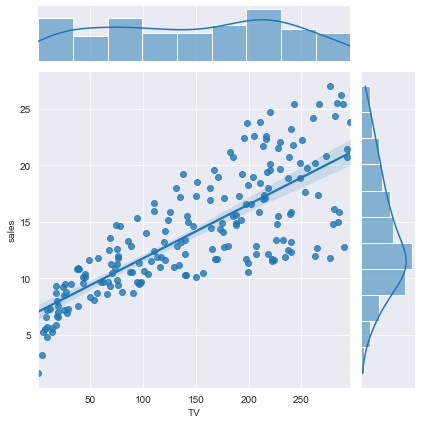

In [ ]:
sns.jointplot('TV','sales', data=df, kind='reg');

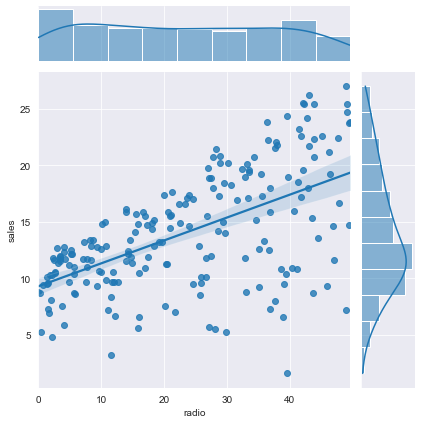

In [ ]:
sns.jointplot('radio','sales', data=df, kind='reg');

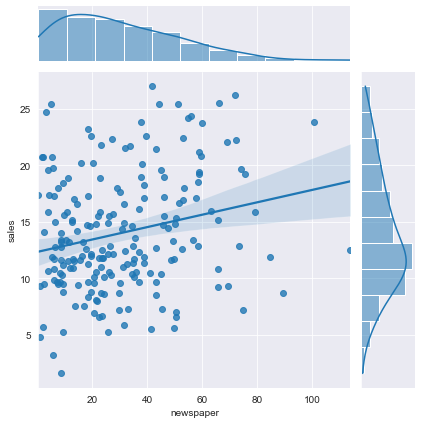

In [ ]:
sns.jointplot('newspaper','sales', data=df, kind='reg');

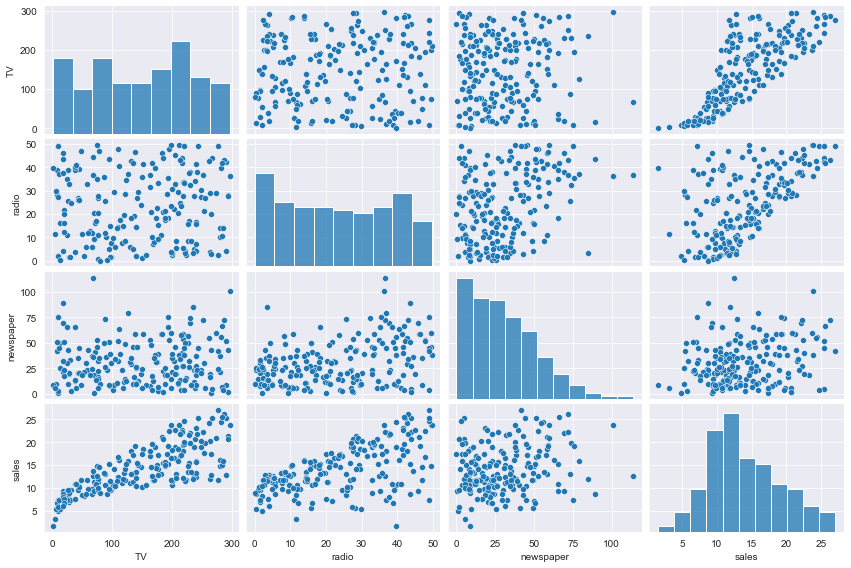

In [ ]:
sns.pairplot(df, size=2, aspect=1.5);

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


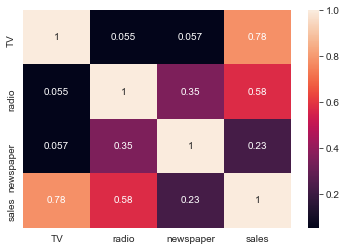

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.iloc[ : , :-1 ]
y = df.iloc[ : , -1 ]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [ ]:
X_test.head()

,TV,radio,newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# ss.fit(X_train)
# ss.transform(X_train)

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[-1.34155345,  1.0355176 ,  1.65941078],
       [-1.4053143 ,  0.08249594, -1.30629738],
       [-0.08995151,  0.40243892, -0.81980897],
       [ 0.69761311, -0.18979597, -0.90868666],
       [ 0.76609699,  0.01442296,  1.28518893],
       [-0.56461564,  0.42286082, -1.01627544],
       [-1.67570755, -1.44914602, -1.36243065],
       [-1.57770476,  1.38268978,  2.77272078],
       [-0.29304164,  0.91979354,  2.29558792],
       [-0.54218127, -1.20408331,  0.19994556],
       [-0.48078193, -0.61865571,  0.07364569],
       [ 0.93258366,  0.60665785,  2.06169926],
       [ 1.2195075 , -0.14214488, -0.00587645],
       [ 0.40596624, -0.16256678, -0.3800983 ],
       [-1.24945444,  0.16418351, -0.44558712],
       [-1.04164129, -0.73437977, -0.55317591],
       [ 1.68118331,  0.33436595,  0.6115896 ],
       [ 0.25955243, -0.35997841,  0.02686796],
       [ 0.61377939, -0.07407191,  0.06896792],
       [-1.69105739,  0.32075135,  0.52738968],
       [ 1.35411375, -1.39468764,  0.602

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train.head()

,0,1,2
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
X_train.columns = ['TV', 'radio', 'newspaper']
X_test.columns = ['TV', 'radio', 'newspaper']

In [ ]:
X_train.head()

,TV,radio,newspaper
0,-1.341553,1.035518,1.659411
1,-1.405314,0.082496,-1.306297
2,-0.089952,0.402439,-0.819809
3,0.697613,-0.189796,-0.908687
4,0.766097,0.014423,1.285189


In [ ]:
X_test.head()

,TV,radio,newspaper
0,-0.960169,-0.196603,-0.553176
1,-1.186874,-0.802453,-0.548498
2,-0.709849,-1.571677,-0.323965
3,1.643399,1.287388,0.985811
4,0.232395,-1.061130,0.237368


In [ ]:
# Modeling
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(random_state=0)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_train = regressor.predict(X_train)

y_pred_test = regressor.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_train, y_pred_train)

0.9967222343482275

In [ ]:
r2_score(y_test, y_pred_test)

0.969484658431562

In [ ]:
param_dist = {
    "criterion" : ['mse', 'friedman_mse', 'mae', 'poisson'],
    'max_depth' : range(2,10),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2,10)
}
param_dist

{'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
 'max_depth': range(2, 10),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': range(2, 10)}

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

gridnew = GridSearchCV(regressor, param_grid=param_dist, n_jobs=-1, cv=5)

gridnew.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 10)})

In [ ]:
gridnew.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=9, random_state=0)

In [ ]:
gridnew.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 2}

In [ ]:
gridnew.best_score_

0.9761602523521807

In [ ]:
y_pred_gridnew = gridnew.predict(X_test)

In [ ]:
y_pred_gridnewtrain = gridnew.predict(X_train)

In [ ]:
r2_score(y_test, y_pred_gridnew)

0.9700305377577575

In [ ]:
r2_score(y_train, y_pred_gridnewtrain)

0.9966892530337691

# Happy Learning